In [38]:
using CairoMakie
using Random
using Distributions
using Unitful, UnitfulAstro
import PhysicalConstants.CODATA2018: h, k_B, c_0, m_e

## This is my markdown code

- A list
- Will be bullets

But can also write equations:

$$
J_\nu = \frac{1}{4\pi}\int I_\nu d\Omega
$$

In [1]:
x = 1

1

In [2]:
x += 2

3

In [17]:
npts = 50
data = rand(Uniform(0, 1), npts)
x = 1:npts;  # use semi-colon to suppress output

In [20]:
x

1:50

In [21]:
collect(x)

50-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

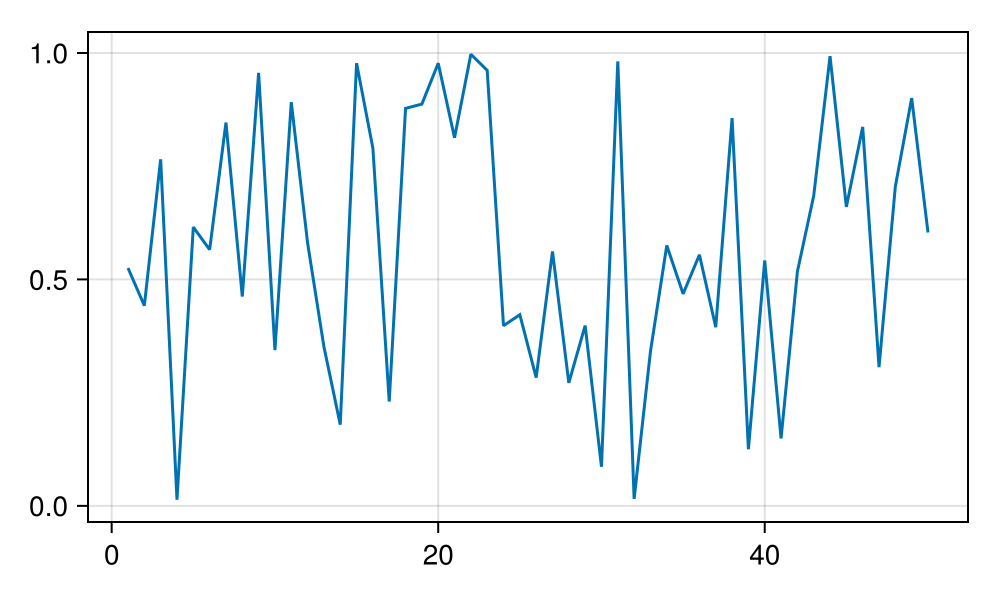

In [18]:
fig = Figure(size=(500,300))
ax = Axis(fig[1,1])
lines!(ax, x, data)
fig  # this forces display of figure

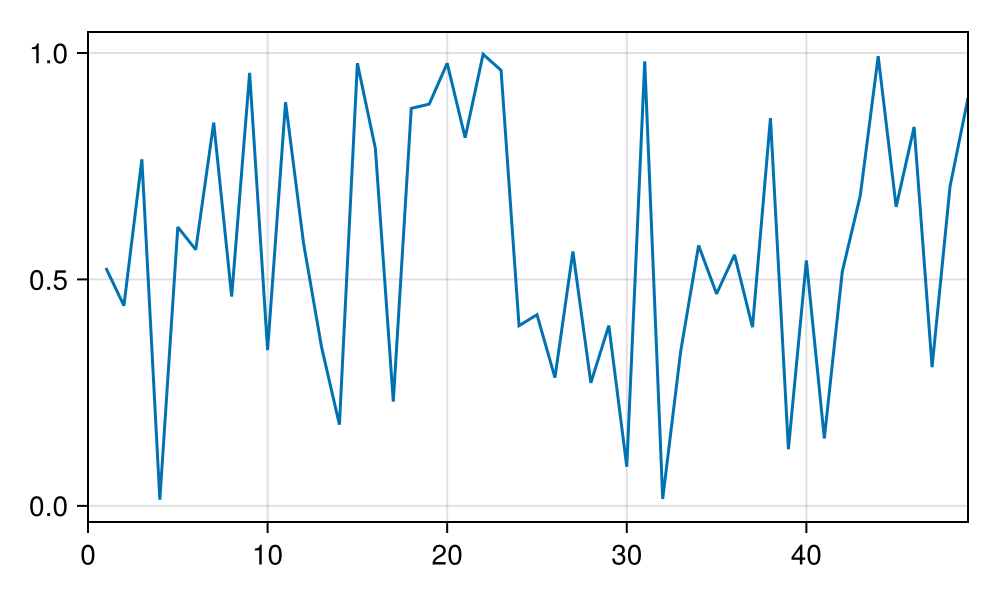

In [19]:
xlims!(ax,0, 49)
fig

## Jupyterlab keyboard shortcuts

* esc: quit edit mode
* enter: enter edit mode

Shortcuts for outside edit mode:
* a: add cell above
* b: add cell below
* m: markdown cell
* c: copy cells
* x: cut cells
* d, d: delete cells
* z: undo cell operation

Other stuff:
* Split cells, merge cells

In [22]:
a = 2

2

In [27]:
a += 1 # ctrl + enter

7

----

## Unitful and PhysicalConstants

In [30]:
42 * u"m"

42 m

In [29]:
42u"m"

42 m

In [31]:
[10, 42]u"m"

2-element Vector{Quantity{Int64, 𝐋, Unitful.FreeUnits{(m,), 𝐋, nothing}}}:
 10 m
 42 m

In [32]:
15.1u"m" / u"s"

15.1 m s⁻¹

In [33]:
15.1u"m/s"

15.1 m s⁻¹

In [34]:
3.0u"km" / (130.51u"m/s")

0.022986744310780783 km s m⁻¹

In [35]:
upreferred(3.0u"km" / (130.51u"m/s"))

22.986744310780782 s

In [36]:
dimension(u"m/s")

𝐋 𝐓⁻¹

In [37]:
4u"s" + 41u"km"

LoadError: DimensionError: 4 s and 41 km are not dimensionally compatible.

### Unit conversion

In [47]:
uconvert(u"W/m^2/Hz", 1u"Jy")

1.0e-26 W Hz⁻¹ m⁻²

In [48]:
uconvert(u"km", 1u"pc")

3.085677581491367e13 km

In [49]:
1u"pc" |> u"km"

3.085677581491367e13 km

In [50]:
c_0

Speed of light in vacuum (c_0)
Value                         = 2.99792458e8 m s⁻¹
Standard uncertainty          = (exact)
Relative standard uncertainty = (exact)
Reference                     = CODATA 2018

In [51]:
h * 400u"PHz"

2.65042806e-31 PHz J s

In [52]:
h * 400u"PHz" |> u"J"

2.6504280599999997e-16 J

In [53]:
spectEquiv(λ::Unitful.Length) = (c_0 / λ) |> u"Hz"
spectEquiv(ν::Unitful.Frequency) = (c_0 / ν) |> u"nm"

spectEquiv (generic function with 2 methods)

In [54]:
spectEquiv(500u"nm")

5.99584916e14 Hz

In [55]:
spectEquiv(1u"PHz")

299.792458 nm

In [61]:
ustrip(0.5u"PHz")

0.5

In [56]:
i_units = u"kW / (m^2 * nm * sr)"

function blackbody_λ(λ, temp) 
    radiation = 2h * c_0^2 * λ^-5 / (exp(h * c_0 / k_B / (λ * temp)) - 1)
    return radiation |> i_units
end

blackbody_λ (generic function with 1 method)

In [57]:
waves = [500, 600]u"nm"
temps = [5000, 6000]u"K"

blackbody_λ.(waves, temps)

2-element Vector{Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻³, Unitful.FreeUnits{(nm⁻¹, m⁻², sr⁻¹, kW), 𝐌 𝐋⁻¹ 𝐓⁻³, nothing}}}:
 12.107190590398112 kW nm⁻¹ m⁻² sr⁻¹
 28.676391377692905 kW nm⁻¹ m⁻² sr⁻¹

In [58]:
blackbody_λ.(waves, temps')

2×2 Matrix{Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻³, Unitful.FreeUnits{(nm⁻¹, m⁻², sr⁻¹, kW), 𝐌 𝐋⁻¹ 𝐓⁻³, nothing}}}:
 12.1072 kW nm⁻¹ m⁻² sr⁻¹  31.7569 kW nm⁻¹ m⁻² sr⁻¹
 12.7624 kW nm⁻¹ m⁻² sr⁻¹  28.6764 kW nm⁻¹ m⁻² sr⁻¹

In [59]:
temps = [2, 5, 6]u"kK"
blackbody_λ.(waves, temps')

2×3 Matrix{Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻³, Unitful.FreeUnits{(nm⁻¹, m⁻², sr⁻¹, kW), 𝐌 𝐋⁻¹ 𝐓⁻³, nothing}}}:
 0.00215055 kW nm⁻¹ m⁻² sr⁻¹  …  31.7569 kW nm⁻¹ m⁻² sr⁻¹
 0.00950751 kW nm⁻¹ m⁻² sr⁻¹     28.6764 kW nm⁻¹ m⁻² sr⁻¹

In [76]:
a = 1:5
b = 1:10
a .* b'

5×10 Matrix{Int64}:
 1   2   3   4   5   6   7   8   9  10
 2   4   6   8  10  12  14  16  18  20
 3   6   9  12  15  18  21  24  27  30
 4   8  12  16  20  24  28  32  36  40
 5  10  15  20  25  30  35  40  45  50

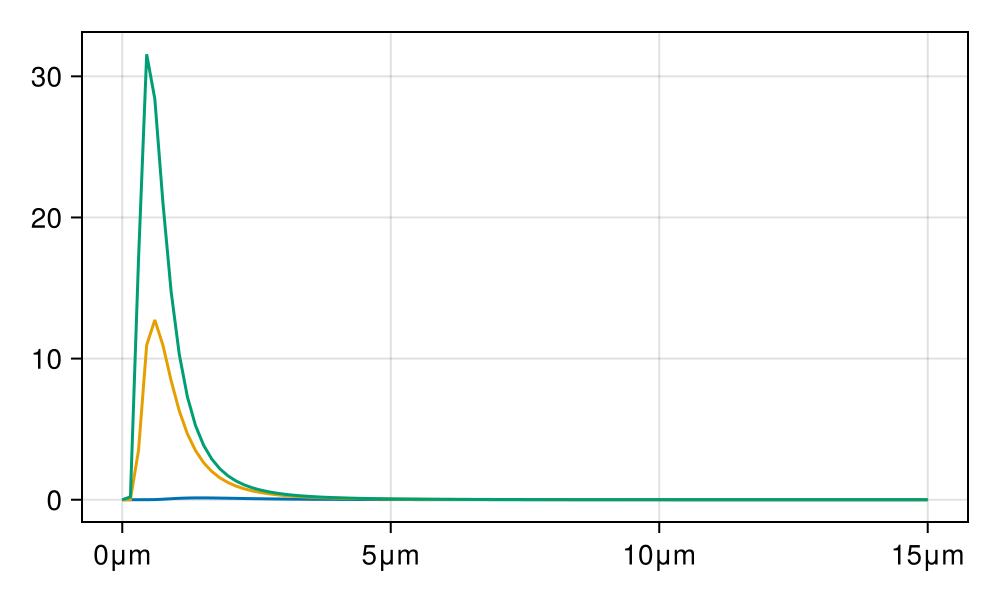

In [65]:
fig = Figure(size=(500,300))
ax = Axis(fig[1,1])

waves = range(0.1, 15000, 100)u"nm"
temps = [2, 5, 6]u"kK"
result = blackbody_λ.(waves, temps')

for i in 1:3
    lines!(ax, waves, ustrip(result[:, i]))
end

fig

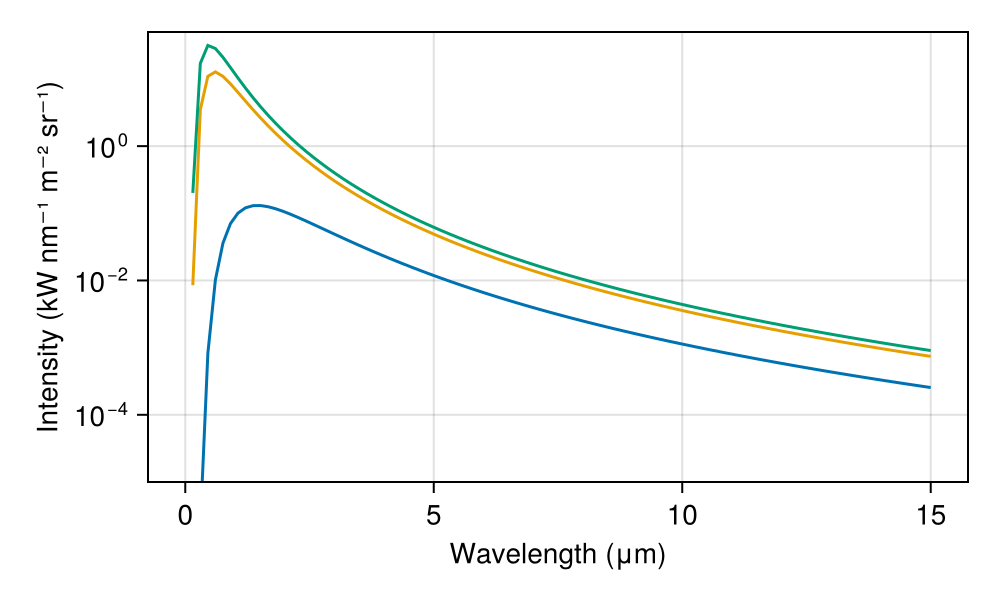

In [80]:
fig = Figure(size=(500,300))
ax = Axis(fig[1,1]; 
          yscale=log10, 
          xlabel="Wavelength (μm)",
          ylabel="Intensity (kW nm⁻¹ m⁻² sr⁻¹)")

waves = range(0.1, 15000, 100)u"nm"
temps = [2, 5, 6]u"kK"
result = blackbody_λ.(waves, temps')

for i in 1:3
    lines!(ax, ustrip(waves .|> u"μm"), ustrip(result[:, i]))
end

ylims!(ax,1e-5, 50)
fig